In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Activation
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.models import load_model
from coremltools.converters import keras as keras_converter
import matplotlib.pyplot as plt
import numpy as np
import coremltools
from coremltools.models import MLModel

Using TensorFlow backend.
/System/Volumes/Data/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/System/Volumes/Data/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/System/Volumes/Data/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Syst

In [2]:
SAMPLE_SIZE = 100

a = 2.0
b = 1.5
x = np.arange(0, 1, (1.0 / SAMPLE_SIZE), dtype=np.float)
noise = (np.random.normal(0, 1, SAMPLE_SIZE) - 0.5) * 0.1
y = (a * x + b) + noise

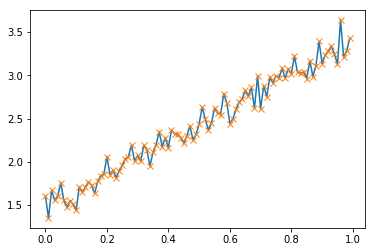

In [3]:
plt.clf()
plt.plot(x, y)
plt.plot(x, y, "x")
plt.show()

In [4]:
keras_model = Sequential([
    Dense(1, input_shape=(1,)),
])

In [5]:
optimizer = SGD(0.03)

keras_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [6]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = keras_model.fit(x, y, epochs=1000, verbose=1)



Epoch 1/1000
100/100 [==============================] - 0s 886us/step - loss: 6.8467 - mean_absolute_error: 2.5072 - mean_squared_error: 6.8467
Epoch 2/1000
100/100 [==============================] - 0s 31us/step - loss: 3.7544 - mean_absolute_error: 1.8364 - mean_squared_error: 3.7544
Epoch 3/1000
100/100 [==============================] - 0s 31us/step - loss: 1.9712 - mean_absolute_error: 1.2866 - mean_squared_error: 1.9712
Epoch 4/1000
100/100 [==============================] - 0s 33us/step - loss: 1.1423 - mean_absolute_error: 0.9408 - mean_squared_error: 1.1423
Epoch 5/1000
100/100 [==============================] - 0s 31us/step - loss: 0.6711 - mean_absolute_error: 0.6886 - mean_squared_error: 0.6711
Epoch 6/1000
100/100 [==============================] - 0s 35us/step - loss: 0.4014 - mean_absolute_error: 0.5170 - mean_squared_error: 0.4014
Epoch 7/1000
100/100 [==============================] - 0s 38us/step - loss: 0.2837 - mean_absolute_error: 0.4347 - mean_squared_error: 0.2

100/100 [==============================] - 0s 35us/step - loss: 0.0407 - mean_absolute_error: 0.1671 - mean_squared_error: 0.0407
Epoch 56/1000
100/100 [==============================] - 0s 32us/step - loss: 0.0397 - mean_absolute_error: 0.1647 - mean_squared_error: 0.0397
Epoch 57/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0389 - mean_absolute_error: 0.1631 - mean_squared_error: 0.0389
Epoch 58/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0379 - mean_absolute_error: 0.1608 - mean_squared_error: 0.0379
Epoch 59/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0370 - mean_absolute_error: 0.1589 - mean_squared_error: 0.0370
Epoch 60/1000
100/100 [==============================] - 0s 33us/step - loss: 0.0360 - mean_absolute_error: 0.1564 - mean_squared_error: 0.0360
Epoch 61/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0354 - mean_absolute_error: 0.1548 - mean_squared_error: 0.0354
Epoch 

100/100 [==============================] - 0s 36us/step - loss: 0.0164 - mean_absolute_error: 0.1023 - mean_squared_error: 0.0164
Epoch 112/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0162 - mean_absolute_error: 0.1014 - mean_squared_error: 0.0162
Epoch 113/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0160 - mean_absolute_error: 0.1009 - mean_squared_error: 0.0160
Epoch 114/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0159 - mean_absolute_error: 0.1006 - mean_squared_error: 0.0159
Epoch 115/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0158 - mean_absolute_error: 0.1002 - mean_squared_error: 0.0158
Epoch 116/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0157 - mean_absolute_error: 0.0993 - mean_squared_error: 0.0157
Epoch 117/1000
100/100 [==============================] - 0s 49us/step - loss: 0.0154 - mean_absolute_error: 0.0989 - mean_squared_error: 0.0154


100/100 [==============================] - 0s 48us/step - loss: 0.0121 - mean_absolute_error: 0.0863 - mean_squared_error: 0.0121
Epoch 168/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0121 - mean_absolute_error: 0.0861 - mean_squared_error: 0.0121
Epoch 169/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0120 - mean_absolute_error: 0.0860 - mean_squared_error: 0.0120
Epoch 170/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0121 - mean_absolute_error: 0.0861 - mean_squared_error: 0.0121
Epoch 171/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0120 - mean_absolute_error: 0.0857 - mean_squared_error: 0.0120
Epoch 172/1000
100/100 [==============================] - 0s 37us/step - loss: 0.0120 - mean_absolute_error: 0.0857 - mean_squared_error: 0.0120
Epoch 173/1000
100/100 [==============================] - 0s 34us/step - loss: 0.0119 - mean_absolute_error: 0.0856 - mean_squared_error: 0.0119


100/100 [==============================] - 0s 38us/step - loss: 0.0113 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0113
Epoch 224/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113
Epoch 225/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0114 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0114
Epoch 226/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0115 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0115
Epoch 227/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0114 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0114
Epoch 228/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0114 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0114
Epoch 229/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0113 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 31us/step - loss: 0.0113 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0113
Epoch 280/1000
100/100 [==============================] - 0s 32us/step - loss: 0.0112 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0112
Epoch 281/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0112 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0112
Epoch 282/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 283/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 284/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0113
Epoch 285/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 32us/step - loss: 0.0113 - mean_absolute_error: 0.0839 - mean_squared_error: 0.0113
Epoch 336/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0113
Epoch 337/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 338/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113
Epoch 339/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0113
Epoch 340/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113
Epoch 341/1000
100/100 [==============================] - 0s 34us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 32us/step - loss: 0.0113 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0113
Epoch 392/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 393/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0114 - mean_absolute_error: 0.0840 - mean_squared_error: 0.0114
Epoch 394/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0839 - mean_squared_error: 0.0113
Epoch 395/1000
100/100 [==============================] - 0s 33us/step - loss: 0.0113 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0113
Epoch 396/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 397/1000
100/100 [==============================] - 0s 33us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 31us/step - loss: 0.0113 - mean_absolute_error: 0.0838 - mean_squared_error: 0.0113
Epoch 448/1000
100/100 [==============================] - 0s 37us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 449/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 450/1000
100/100 [==============================] - 0s 44us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 451/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113
Epoch 452/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0113
Epoch 453/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0112 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 44us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 504/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 505/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 506/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 507/1000
100/100 [==============================] - 0s 57us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 508/1000
100/100 [==============================] - 0s 59us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 509/1000
100/100 [==============================] - 0s 46us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 38us/step - loss: 0.0113 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0113
Epoch 560/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 561/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 562/1000
100/100 [==============================] - 0s 53us/step - loss: 0.0113 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0113
Epoch 563/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 564/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 565/1000
100/100 [==============================] - 0s 64us/step - loss: 0.0112 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 42us/step - loss: 0.0113 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0113
Epoch 616/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 617/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0113 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0113
Epoch 618/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 619/1000
100/100 [==============================] - 0s 37us/step - loss: 0.0113 - mean_absolute_error: 0.0838 - mean_squared_error: 0.0113
Epoch 620/1000
100/100 [==============================] - 0s 37us/step - loss: 0.0113 - mean_absolute_error: 0.0838 - mean_squared_error: 0.0113
Epoch 621/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0113 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 39us/step - loss: 0.0113 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0113
Epoch 672/1000
100/100 [==============================] - 0s 34us/step - loss: 0.0113 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0113
Epoch 673/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 674/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 675/1000
100/100 [==============================] - 0s 30us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 676/1000
100/100 [==============================] - 0s 34us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 677/1000
100/100 [==============================] - 0s 36us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 31us/step - loss: 0.0113 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0113
Epoch 728/1000
100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0113
Epoch 729/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 730/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0112 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0112
Epoch 731/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0112 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0112
Epoch 732/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0112 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0112
Epoch 733/1000
100/100 [==============================] - 0s 32us/step - loss: 0.0113 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 57us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 784/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 785/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0113 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0113
Epoch 786/1000
100/100 [==============================] - 0s 84us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 787/1000
100/100 [==============================] - 0s 71us/step - loss: 0.0113 - mean_absolute_error: 0.0835 - mean_squared_error: 0.0113
Epoch 788/1000
100/100 [==============================] - 0s 77us/step - loss: 0.0112 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0112
Epoch 789/1000
100/100 [==============================] - 0s 64us/step - loss: 0.0113 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 46us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 840/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0113 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0113
Epoch 841/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 842/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0112 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0112
Epoch 843/1000
100/100 [==============================] - 0s 40us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 844/1000
100/100 [==============================] - 0s 43us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 845/1000
100/100 [==============================] - 0s 46us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112


100/100 [==============================] - 0s 64us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 896/1000
100/100 [==============================] - 0s 50us/step - loss: 0.0112 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0112
Epoch 897/1000
100/100 [==============================] - 0s 63us/step - loss: 0.0112 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0112
Epoch 898/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 899/1000
100/100 [==============================] - 0s 42us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 900/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0113 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0113
Epoch 901/1000
100/100 [==============================] - 0s 51us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113


100/100 [==============================] - 0s 35us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 952/1000
100/100 [==============================] - 0s 39us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 953/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0113 - mean_absolute_error: 0.0829 - mean_squared_error: 0.0113
Epoch 954/1000
100/100 [==============================] - 0s 32us/step - loss: 0.0112 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0112
Epoch 955/1000
100/100 [==============================] - 0s 33us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113
Epoch 956/1000
100/100 [==============================] - 0s 32us/step - loss: 0.0113 - mean_absolute_error: 0.0828 - mean_squared_error: 0.0113
Epoch 957/1000
100/100 [==============================] - 0s 38us/step - loss: 0.0113 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0113


In [8]:
score = keras_model.predict(x)

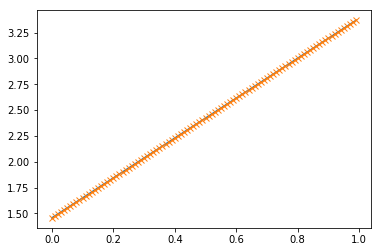

In [9]:
plt.clf()
plt.plot(x, score)
plt.plot(x, score, "x")
plt.show()

In [10]:
first_layer_weights = keras_model.layers[0].get_weights()[0]
first_layer_biases  = keras_model.layers[0].get_weights()[1]

first_layer_weights, first_layer_biases

(array([[1.9330856]], dtype=float32), array([1.4562434], dtype=float32))

In [11]:
keras_model.save('/Users/jacopo/S4TF_CoreML_Test/Models/keras_model_personalization.h5')

In [12]:
core_model = keras_converter.convert(keras_model, input_names=['dense_input'],
                                output_names=['output'])
    
core_model.save('/Users/jacopo/S4TF_CoreML_Test/Models/keras_model_pers_temp.mlmodel')

core_model

0 : dense_1_input, <keras.engine.input_layer.InputLayer object at 0xa322138d0>
1 : dense_1, <keras.layers.core.Dense object at 0xa321c7090>


input {
  name: "dense_input"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}
output {
  name: "output"
  type {
    multiArrayType {
      shape: 1
      dataType: DOUBLE
    }
  }
}
metadata {
  userDefined {
    key: "coremltoolsVersion"
    value: "3.1"
  }
}

In [13]:
spec = core_model.get_spec()
spec

specificationVersion: 1
description {
  input {
    name: "dense_input"
    type {
      multiArrayType {
        shape: 1
        dataType: DOUBLE
      }
    }
  }
  output {
    name: "output"
    type {
      multiArrayType {
        shape: 1
        dataType: DOUBLE
      }
    }
  }
  metadata {
    userDefined {
      key: "coremltoolsVersion"
      value: "3.1"
    }
  }
}
neuralNetwork {
  layers {
    name: "dense_1"
    input: "dense_input"
    output: "output"
    innerProduct {
      inputChannels: 1
      outputChannels: 1
      hasBias: true
      weights {
        floatValue: 1.933085560798645
      }
      bias {
        floatValue: 1.4562433958053589
      }
    }
  }
}

In [14]:
data = {'dense_input': np.array([1.0])}
predictions = core_model.predict(data)
predictions

{'output': array([3.38867188])}

In [15]:
spec = coremltools.utils.load_spec("/Users/jacopo/S4TF_CoreML_Test/Models/keras_model_pers_temp.mlmodel")
builder = coremltools.models.neural_network.NeuralNetworkBuilder(spec=spec)
builder.inspect_layers(last=2)
builder.inspect_input_features()

[Id: 0], Name: dense_1 (Type: innerProduct)
          Updatable: False
          Input blobs: ['dense_input']
          Output blobs: ['output']
[Id: 0] Name: dense_input
          Type: multiArrayType {
  shape: 1
  dataType: DOUBLE
}



In [16]:
neuralnetwork_spec = builder.spec

# neuralnetwork_spec.description.input[0].type.imageType.width = 150
# neuralnetwork_spec.description.input[0].type.imageType.height = 150

neuralnetwork_spec.description.metadata.author = 'Jacopo Mangiavacchi'
neuralnetwork_spec.description.metadata.license = 'MIT'
neuralnetwork_spec.description.metadata.shortDescription = (
'Trivial linear classifier')

In [17]:
model_spec = builder.spec
builder.make_updatable(['dense_1'])
builder.set_mean_squared_error_loss(name='lossLayer', 
                                    input_feature=('output', coremltools.models.datatypes.Array(1)))
# builder.set_categorical_cross_entropy_loss(name='lossLayer', input='output')

from coremltools.models.neural_network import SgdParams
builder.set_sgd_optimizer(SgdParams(lr=0.01, batch=5))
builder.set_epochs(2)

Now adding input output_true as target for mean squared error loss layer.


In [18]:
mlmodel_updatable = MLModel(model_spec)
mlmodel_updatable.save("/Users/jacopo/S4TF_CoreML_Test/Models/keras_model_personalization.mlmodel")